In [ ]:
import os
import pickle
from glob import glob

In [2]:
import numpy as np

import torch

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../src")

In [4]:
from utils.plots import input2image
from utils import plots

from my_model import get_ilsvrc2012
from utils.load_model import get_model
from utils.config import dict_from_config_file
from utils.tensortracker import TensorTracker

from utils import receptive_field
from utils.receptive_field import get_downconv
from utils.receptive_field_tracker import RFTracker
from my_model import get_receptive_field
from utils import plots
from utils.plots import input2image
from utils.plots import clip_on_imagespace
from utils.analysis import exts
from utils import config

In [5]:
from torch import optim
from tqdm import tqdm

In [6]:
from utils.analysis import analyis_layers

from utils.dumpLoaders import RFdataLoader

In [7]:
arch = "resnet34-skip4"
device = "cuda:1"

model = get_model(arch)
model = model.to(device)
model = model.eval()


In [8]:
tracker = TensorTracker(model)

In [9]:
img = torch.randn(10, 3, 224, 224, device=device)
_ = model(img)

In [10]:
tracker.remove_hook()

In [11]:
list(tracker.fmap_pool.keys())

['conv1',
 'bn1',
 'relu',
 'maxpool',
 'layer1.0.conv1',
 'layer1.0.bn1',
 'layer1.0.relu1',
 'layer1.0.conv2',
 'layer1.0.bn2',
 'layer1.0.add_func',
 'layer1.0.relu2',
 'layer1.0',
 'layer1.1.conv1',
 'layer1.1.bn1',
 'layer1.1.relu1',
 'layer1.1.conv2',
 'layer1.1.bn2',
 'layer1.1.add_func',
 'layer1.1.relu2',
 'layer1.1',
 'layer1.2.conv1',
 'layer1.2.bn1',
 'layer1.2.relu1',
 'layer1.2.conv2',
 'layer1.2.bn2',
 'layer1.2.add_func',
 'layer1.2.relu2',
 'layer1.2',
 'layer1',
 'layer2.0.conv1',
 'layer2.0.bn1',
 'layer2.0.relu1',
 'layer2.0.conv2',
 'layer2.0.bn2',
 'layer2.0.downsample.0',
 'layer2.0.downsample.1',
 'layer2.0.downsample',
 'layer2.0.add_func',
 'layer2.0.relu2',
 'layer2.0',
 'layer2.1.conv1',
 'layer2.1.bn1',
 'layer2.1.relu1',
 'layer2.1.conv2',
 'layer2.1.bn2',
 'layer2.1.add_func',
 'layer2.1.relu2',
 'layer2.1',
 'layer2.2.conv1',
 'layer2.2.bn1',
 'layer2.2.relu1',
 'layer2.2.conv2',
 'layer2.2.bn2',
 'layer2.2.add_func',
 'layer2.2.relu2',
 'layer2.2',
 'la

In [12]:
np_data = tracker.fmap_pool["layer1.2.relu2"].numpy()

In [13]:
np_data.shape

(10, 64, 56, 56)

In [14]:
tmp_data = np.transpose(np_data, (1, 0, 2, 3))
tmp_data = tmp_data.reshape(np_data.shape[1], -1)
count_nonzero = np.count_nonzero(tmp_data, axis=-1)

<BarContainer object of 64 artists>

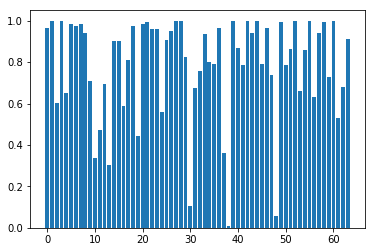

In [15]:
plt.bar(np.arange(tmp_data.shape[0]), count_nonzero / np.prod(tmp_data.shape[1]))

In [16]:
np_data = tracker.fmap_pool["layer3.2.relu2"].numpy()

In [17]:
np_data.shape

(10, 256, 14, 14)

In [18]:
tmp_data = np.transpose(np_data, (1, 0, 2, 3))
tmp_data = tmp_data.reshape(np_data.shape[1], -1)
count_nonzero = np.count_nonzero(tmp_data, axis=-1)

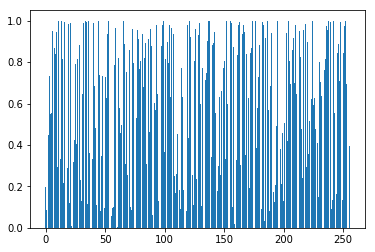

In [19]:
plt.bar(np.arange(tmp_data.shape[0]), count_nonzero / np.prod(tmp_data.shape[1]))
plt.show()

In [20]:
root = "/mnt/nas5/lab_member_directories/2021_genta/resnet/e_receptive_field/"

In [21]:
keywords = {
    "rfimgs"
}

In [22]:
rfloader = RFdataLoader(None, rf_root=root, keywords=keywords)

In [23]:
key_layer = "layer3"
block_id = 3
model_name = "20200409_resnet34"
rfloader.set_vis_layer(model_name, key_layer, block_id)

In [24]:
ch = 76
rfloader.set_ch_data(ch)

In [25]:
rfloader.rfimgs.shape

(101, 3, 224, 224)

In [26]:
n_sample = 100
images = torch.as_tensor(rfloader.rfimgs[:n_sample], device=device)
out = model(images)

In [27]:
analyis_layers

['maxpool',
 'layer1.0',
 'layer1.1',
 'layer1.2',
 'layer2.0',
 'layer2.1',
 'layer2.2',
 'layer2.3',
 'layer3.0',
 'layer3.1',
 'layer3.2',
 'layer3.3',
 'layer3.4',
 'layer3.5',
 'layer4.0',
 'layer4.1',
 'layer4.2']

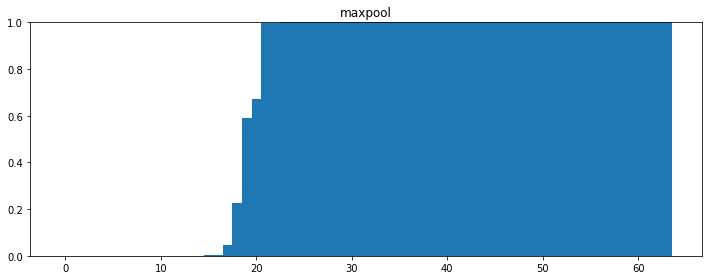

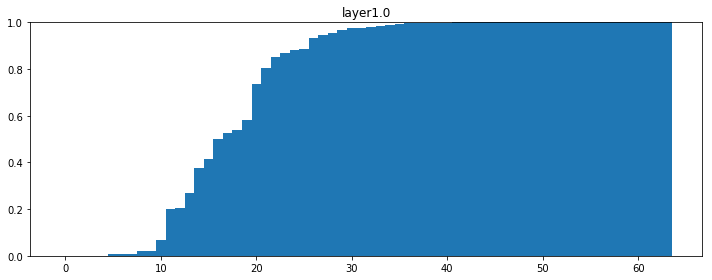

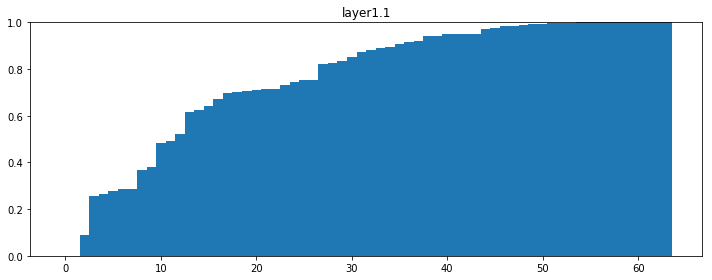

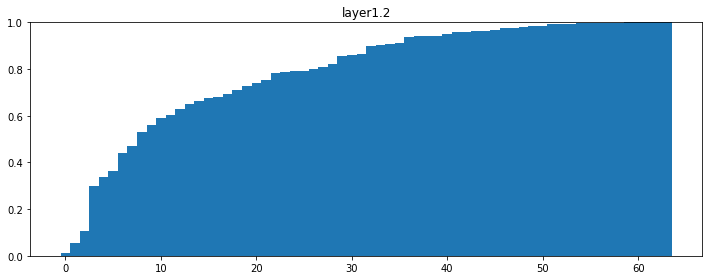

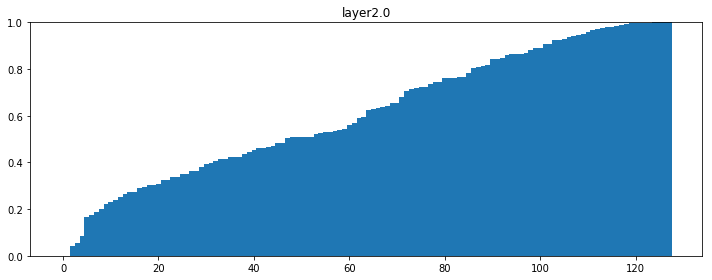

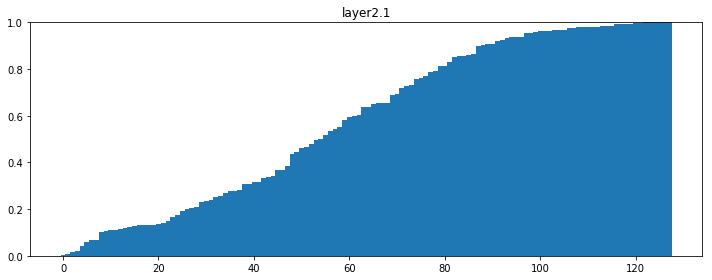

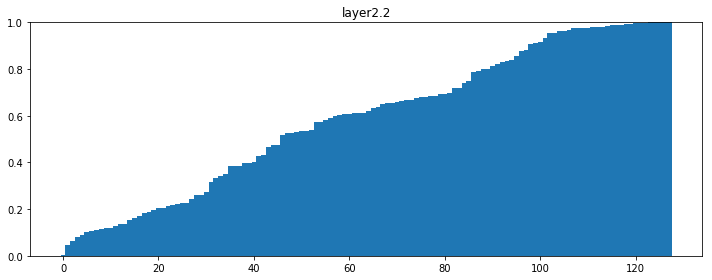

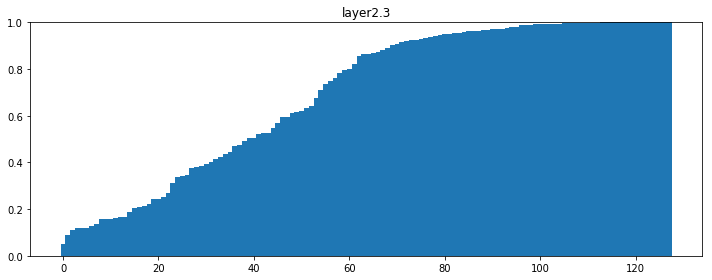

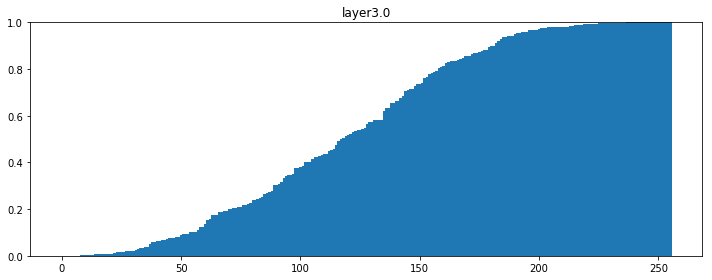

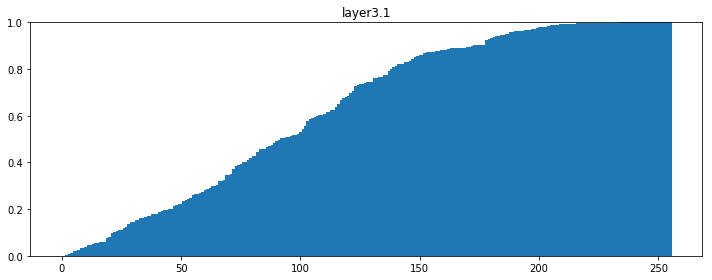

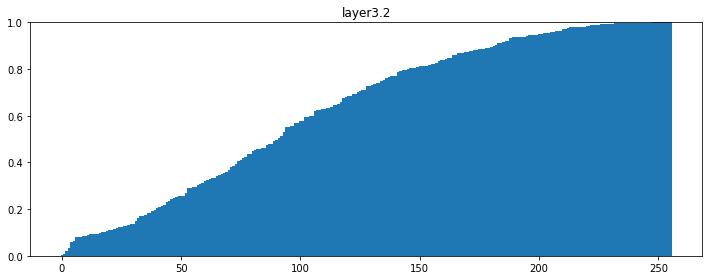

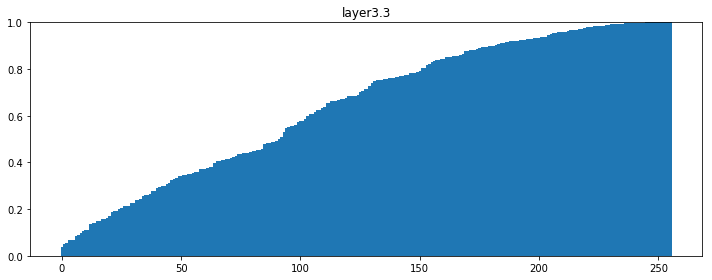

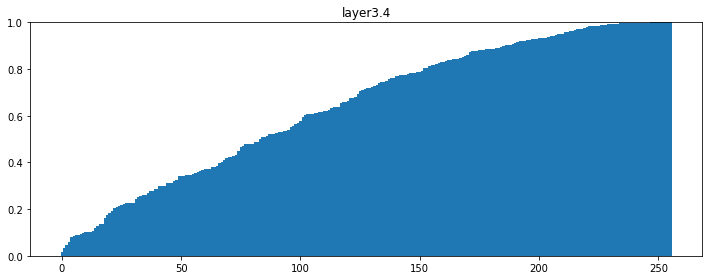

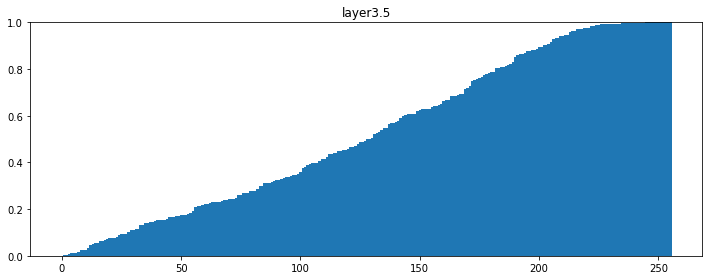

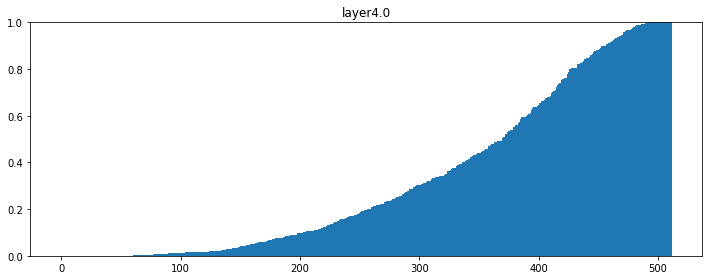

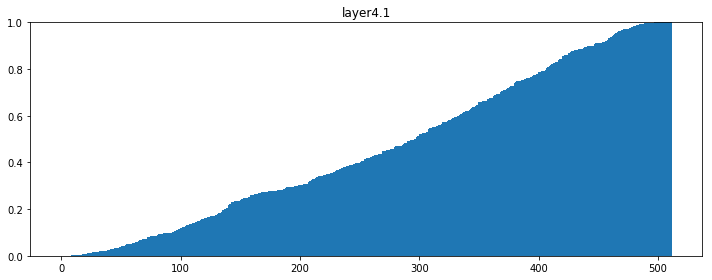

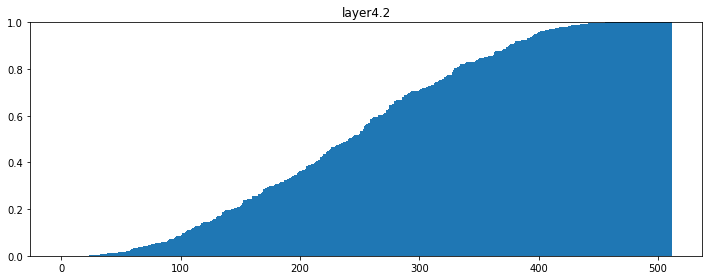

In [28]:
figsize = (10, 4)
for layer_name in analyis_layers:
    if layer_name == "maxpool":
        np_data = tracker.fmap_pool[layer_name].numpy()
    else:
        np_data = tracker.fmap_pool[layer_name + ".relu2"].numpy()
    tmp_data = np.transpose(np_data, (1, 0, 2, 3))
    tmp_data = tmp_data.reshape(np_data.shape[1], -1)
    count_nonzero = np.count_nonzero(tmp_data, axis=-1)
    data = count_nonzero / np.prod(tmp_data.shape[1])
    data = np.sort(data)
    plt.figure(figsize=figsize)
    plt.title(layer_name)
    plt.bar(np.arange(tmp_data.shape[0]), data, width=1)
    plt.tight_layout()
    plt.ylim(0, 1)
    plt.show()

[0.69591338]
[0.72605728]
[0.76077109]
[0.78891651]
[0.61197883]
[0.58206214]
[0.5883231]
[0.69371612]
[0.5422433]
[0.63158482]
[0.63113839]
[0.64711017]
[0.64531051]
[0.52484255]
[0.32549426]
[0.45980947]
[0.53396843]


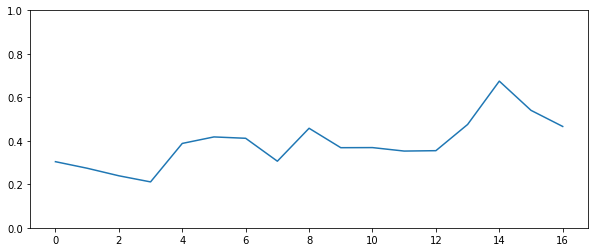

In [30]:

datas = []
for layer_name in analyis_layers:
    if layer_name == "maxpool":
        np_data = tracker.fmap_pool[layer_name].numpy()
    else:
        np_data = tracker.fmap_pool[layer_name + ".relu2"].numpy()
    tmp_data = np_data.copy()
    tmp_data = tmp_data.reshape(1, -1)
    count_nonzero = np.count_nonzero(tmp_data, axis=-1)
    data = count_nonzero / np.prod(tmp_data.shape[1])
    print(data)
    datas.append(data)
datas = np.asarray(datas)
plt.figure(figsize=figsize)
plt.plot(1 - datas)
plt.ylim(0, 1)
plt.show()

In [31]:
def make_np_images():
    np_images = np.zeros((channels, 3, 224, 224))
    for b in range(0, channels, batch_size):
        print(b)
        bd = len(np_images[b:b + batch_size])
        if zero_start:
            images = torch.zeros(
                bd, 3, 224, 224, requires_grad=True, device=device)
        else:
            if random_type == "normal":
                images = torch.randn(
                    bd, 3, 224, 224, requires_grad=True, device=device)
            elif random_type == "uniform":
                images = torch.empty(bd, 3, 224, 224, requires_grad=True, device=device)
                torch.nn.init.uniform_(images, -1, 1)
            else:
                raise ValueError(random_type)

        if optim_type == "adam":
            optimizer = optim.Adam([images], lr=lr, weight_decay=wd)
            for _ in tqdm(range(max_iter), total=max_iter):
                optimizer.zero_grad()
                out = model.layer_forward(images, layers=[layer_name])[layer_name]
                _, c, h, w = out.shape
                n_index = torch.arange(bd, dtype=torch.long, device=device)
                ch_index = torch.arange(b, b + bd, dtype=torch.long, device=device)
                if mode == 'neuron':
                    o = out[n_index, ch_index, h // 2, w // 2]
                    loss = - torch.sum(o) / len(images)
                    loss.backward()
                elif mode == "layer":
                    o = out[n_index, ch_index] / (h * w)
                    loss = - torch.sum(o) / len(images)
                    loss.backward()
                else:
                    o = out[n_index, ch_index, h // 2, w // 2]
                    with torch.no_grad():
                        tensor = -0.01 * torch.ones_like(o)
                    with torch.no_grad():
                        loss = - torch.sum(o) / len(images)
                    o.backward(gradient=tensor)
                optimizer.step()
                if clip_inputspace:
                    images = clip_on_imagespace(images)
        elif optim_type == "lbfgs":
            optimizer = optim.LBFGS([images], lr=lr, max_iter=5)

            def closure():
                out = model.layer_forward(images, layers=[layer_name])[layer_name]
                _, c, h, w = out.shape
                n_index = torch.arange(bd, dtype=torch.long, device=device)
                ch_index = torch.arange(b, b + bd, dtype=torch.long, device=device)
                if mode == 'neuron':
                    o = out[n_index, ch_index, h // 2, w // 2]
                    loss = - torch.sum(o) / len(images) + wd * torch.mean(torch.pow(images, 2))
                elif mode == "layer":
                    o = out[n_index, ch_index] / (h * w)
                    loss = - torch.sum(o) / len(images) + wd * torch.mean(torch.pow(images, 2))
                loss.backward()
                return loss

            for _ in tqdm(range(max_iter), total=max_iter):
                optimizer.zero_grad()
                optimizer.step(closure)
                if clip_inputspace:
                    images = clip_on_imagespace(images, image_min=0.3, image_max=0.7)
        else:
            raise ValueError(optim_type)

        np_images[b:b + bd] = images.to('cpu').detach().numpy()
    if mode in ('neuron', "other"):
        np_images = np_images[:, :, hs[0]:hs[1], ws[0]:ws[1]]
    return np_images

In [32]:
mode = "neuron"
batch_size = 256
max_iter = 50
lr = 1e-2
wd = 1e-3
random_type = "normal"
channel_wise = False
zero_start = False
optim_type = "adam"
is_sorted_channel = False
clip_inputspace = False

In [33]:
mode = "neuron"
batch_size = 256
max_iter = 50
lr = 5e-2
wd = 1e-4
random_type = "normal"
channel_wise = False
zero_start = False
optim_type = "adam"
is_sorted_channel = True
clip_inputspace = True

In [34]:
layer_name = "layer3.3.relu2"
arch = "resnet34-skip4"
device = "cuda:1"

model = get_model(arch)
model = model.to(device)
model = model.eval()

for m in model.parameters():
    m.require_grad = False

tracker = RFTracker(model)
img = torch.randn(1, 3, 224, 224, device=device)
out = model(img, layers=[layer_name])[layer_name]
# check arch is path
if os.path.exists(arch):
    dname = os.path.dirname(arch)
    arch_name = os.path.basename(dname)
else:
    arch_name = arch
out_path = '{}_layer-{}'.format(arch_name, layer_name)
# path = '{}_layer-{}'.format(args.arch, args.layer_name)
print(out_path)
final_rf = tracker.rf_pool[layer_name]
_, _, h, w = out.shape
center, rf = get_receptive_field((h // 2, w // 2), final_rf)
hs, ws = receptive_field.get_rf_region(center, rf)
tracker.remove_hook()
fmap_shape = out.shape

channels = fmap_shape[1]

resnet34-skip4_layer-layer3.3.relu2


In [35]:
tracker.remove()

In [36]:
np_images = make_np_images()

  2%|▏         | 1/50 [00:00<00:07,  6.67it/s]

0


100%|██████████| 50/50 [00:18<00:00,  2.72it/s]


In [37]:
tensortracker = TensorTracker(model)

In [38]:
model.to("cpu")
_ = model(torch.as_tensor(np_images, dtype=torch.float32, device="cpu"))

[0.67188788]
[0.85788314]
[0.90221835]
[0.89009079]
[0.69326342]
[0.63705534]
[0.65534798]
[0.70644324]
[0.53293796]
[0.6188894]
[0.62880785]
[0.61885585]
[0.58208925]
[0.4798271]
[0.30884723]
[0.38288397]
[0.52122108]


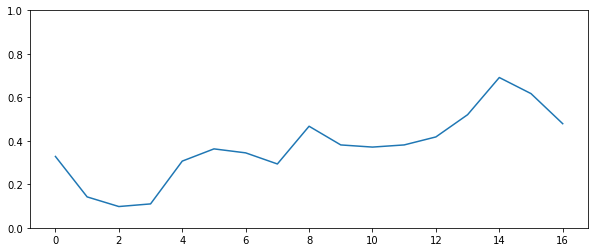

In [39]:
figsize = (10, 4)
datas = []
for layer_name in analyis_layers:
    if layer_name == "maxpool":
        np_data = tensortracker.fmap_pool[layer_name].numpy()
    else:
        np_data = tensortracker.fmap_pool[layer_name + ".relu2"].numpy()
    tmp_data = np_data.copy()
    tmp_data = tmp_data.reshape(1, -1)
    count_nonzero = np.count_nonzero(tmp_data, axis=-1)
    data = count_nonzero / np.prod(tmp_data.shape[1])
    print(data)
    datas.append(data)
datas = np.asarray(datas)
plt.figure(figsize=figsize)
plt.plot(1 - datas)
plt.ylim(0, 1)
plt.show()

In [40]:
hoge = [
    [0.69564827],
    [0.80148607],
    [0.80716334],
    [0.81643136],
    [0.61423579],
    [0.59524763],
    [0.54632703],
    [0.63052814],
    [0.51812241],
    [0.56181421],
    [0.56851024],
    [0.57754843],
    [0.51987624],
    [0.38836177],
    [0.30352997],
    [0.37632573],
    [0.55975367],
]

In [41]:
hoge = [
    [0.69591338],
    [0.72605728],
    [0.76077109],
    [0.78891651],
    [0.61197883],
    [0.58206214],
    [0.5883231],
    [0.69371612],
    [0.5422433],
    [0.63158482],
    [0.63113839],
    [0.64711017],
    [0.64531051],
    [0.52484255],
    [0.32549426],
    [0.45980947],
    [0.53396843],
]

In [42]:
hoge = np.asarray(hoge)

In [43]:
hoge.shape, datas.shape

((17, 1), (17, 1))

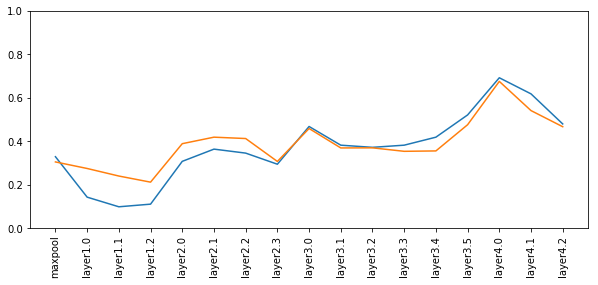

In [44]:
plt.figure(figsize=figsize)
plt.plot(1 - datas)
plt.plot(1 - hoge)
plt.ylim(0, 1)
plt.xticks(ticks=np.arange(len(analyis_layers)), labels=analyis_layers, rotation=90)
plt.show()

In [45]:
from collections import OrderedDict

In [46]:
origin_target_values = OrderedDict({k: hoge[cnt][0] for cnt, k in enumerate(analyis_layers)})

In [47]:
layer_name = "layer3.3"

In [48]:
def fix_layer_name(layer_name):
    if not layer_name == "maxpool":
        layer_name = layer_name + ".relu2"
    return layer_name

target_values = {}
for key in origin_target_values.keys():
    if fix_layer_name(key) == fix_layer_name(layer_name):
        break
    target_values[key] = origin_target_values[key]

In [49]:
target_values

{'maxpool': 0.69591338,
 'layer1.0': 0.72605728,
 'layer1.1': 0.76077109,
 'layer1.2': 0.78891651,
 'layer2.0': 0.61197883,
 'layer2.1': 0.58206214,
 'layer2.2': 0.5883231,
 'layer2.3': 0.69371612,
 'layer3.0': 0.5422433,
 'layer3.1': 0.63158482,
 'layer3.2': 0.63113839}

In [50]:
def make_np_images(target_values=None):
    if target_values is None:
        layers = [layer_name]
    else:
        layers = list(target_values.keys())
        fmap_tracker = TensorTracker(model, layers, detach_tensors=False, ignore_backward=True)
        layers = layers + [layer_name]
        
    np_images = np.zeros((channels, 3, 224, 224))
    for b in range(0, channels, batch_size):
        print(b)
        bd = len(np_images[b:b + batch_size])
        if zero_start:
            images = torch.zeros(
                bd, 3, 224, 224, requires_grad=True, device=device)
        else:
            if random_type == "normal":
                images = torch.randn(
                    bd, 3, 224, 224, requires_grad=True, device=device)
            elif random_type == "uniform":
                images = torch.empty(bd, 3, 224, 224, requires_grad=True, device=device)
                torch.nn.init.uniform_(images, -1, 1)
            else:
                raise ValueError(random_type)

        if optim_type == "adam":
            optimizer = optim.Adam([images], lr=lr, weight_decay=wd)
            for _ in tqdm(range(max_iter), total=max_iter):
                optimizer.zero_grad()
                outs = model.layer_forward(images, layers=[layer_name])
                loss = 0
                if target_values is not None:
                    for key in target_values.keys():
                        tmp_loss = fmap_tracker.fmap_pool[key]
                        tmp_loss = torch.mean(torch.relu(torch.sign(tmp_loss)), dim=(1, 2, 3))
#                         loss += torch.mean(torch.relu(tmp_loss - target_values[key]) ** 2)
                        loss += 1 * torch.mean((tmp_loss - target_values[key]) ** 2)
                        

                out = outs[layer_name]
                _, c, h, w = out.shape
                n_index = torch.arange(bd, dtype=torch.long, device=device)
                ch_index = torch.arange(b, b + bd, dtype=torch.long, device=device)
                if mode == 'neuron':
                    o = out[n_index, ch_index, h // 2, w // 2]
                    loss += - torch.sum(o) / len(images)
                    loss.backward()
                elif mode == "layer":
                    o = out[n_index, ch_index] / (h * w)
                    loss += - torch.sum(o) / len(images)
                    loss.backward()
                else:
                    o = out[n_index, ch_index, h // 2, w // 2]
                    with torch.no_grad():
                        tensor = -0.01 * torch.ones_like(o)
                    with torch.no_grad():
                        loss = - torch.sum(o) / len(images)
                    o.backward(gradient=tensor)
                optimizer.step()
                if clip_inputspace:
                    images = clip_on_imagespace(images)
        elif optim_type == "lbfgs":
            optimizer = optim.LBFGS([images], lr=lr, max_iter=5)

            def closure():
                out = model.layer_forward(images, layers=[layer_name])[layer_name]
                _, c, h, w = out.shape
                n_index = torch.arange(bd, dtype=torch.long, device=device)
                ch_index = torch.arange(b, b + bd, dtype=torch.long, device=device)
                if mode == 'neuron':
                    o = out[n_index, ch_index, h // 2, w // 2]
                    loss = - torch.sum(o) / len(images) + wd * torch.mean(torch.pow(images, 2))
                elif mode == "layer":
                    o = out[n_index, ch_index] / (h * w)
                    loss = - torch.sum(o) / len(images) + wd * torch.mean(torch.pow(images, 2))
                loss.backward()
                return loss

            for _ in tqdm(range(max_iter), total=max_iter):
                optimizer.zero_grad()
                optimizer.step(closure)
                if clip_inputspace:
                    images = clip_on_imagespace(images, image_min=0.3, image_max=0.7)
        else:
            raise ValueError(optim_type)

        np_images[b:b + bd] = images.to('cpu').detach().numpy()
    if mode in ('neuron', "other"):
        np_images = np_images[:, :, hs[0]:hs[1], ws[0]:ws[1]]
    if target_values is not None:
        fmap_tracker.remove_hook()
    return np_images

In [33]:
mode = "neuron"
batch_size = 256
max_iter = 50
lr = 5e-2
wd = 1e-4
random_type = "normal"
channel_wise = False
zero_start = False
optim_type = "adam"
is_sorted_channel = True
clip_inputspace = True

In [51]:
# device = "cpu"
model = model.to(device)

In [52]:
np_images = make_np_images()

  0%|          | 0/50 [00:00<?, ?it/s]

0


100%|██████████| 50/50 [10:04<00:00, 12.13s/it]


In [53]:
np_images0 = make_np_images(target_values)

  0%|          | 0/50 [00:00<?, ?it/s]

0


100%|██████████| 50/50 [10:07<00:00, 12.14s/it]


In [54]:
np_images0.shape

(256, 3, 224, 224)

In [55]:
fmap_tracker = TensorTracker(model, ignore_backward=True)

# model.to("cpu")
# _ = model(torch.as_tensor(np_images0, dtype=torch.float32, device="cpu"))

# model.to("cpu")
_ = model(torch.as_tensor(np_images0, dtype=torch.float32, device=device))

fmap_tracker.remove_hook()

[0.67188713]
[0.85830778]
[0.90251031]
[0.8910075]
[0.69438744]
[0.6368697]
[0.65553377]
[0.70676076]
[0.53254832]
[0.62022735]
[0.62867861]
[0.61817076]
[0.58311151]
[0.48135298]
[0.30818659]
[0.3807331]
[0.51812261]


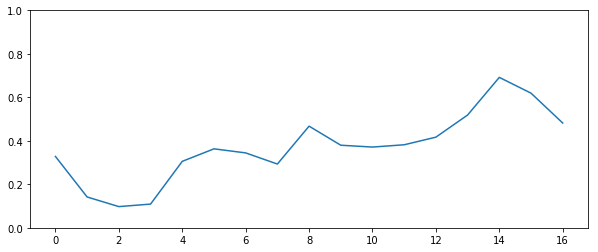

In [56]:
figsize = (10, 4)
datas0 = []
for layer_name in analyis_layers:
#     if layer_name == "maxpool":
#         np_data = fmap_tracker.fmap_pool[layer_name].numpy()
#     else:
#         np_data = fmap_tracker.fmap_pool[layer_name + ".relu2"].numpy()
    np_data = fmap_tracker.fmap_pool[layer_name].numpy()
    tmp_data = np_data.copy()
    tmp_data = tmp_data.reshape(1, -1)
    count_nonzero = np.count_nonzero(tmp_data, axis=-1)
    data = count_nonzero / np.prod(tmp_data.shape[1])
    print(data)
    datas0.append(data)
datas0 = np.asarray(datas0)
plt.figure(figsize=figsize)
plt.plot(1 - datas0)
plt.ylim(0, 1)
plt.show()

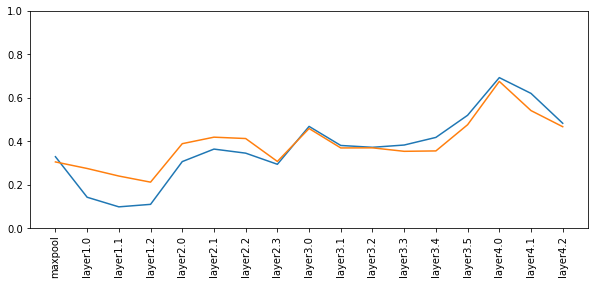

In [57]:
plt.figure(figsize=figsize)
plt.plot(1 - datas0)
plt.plot(1 - hoge)
plt.ylim(0, 1)
plt.xticks(ticks=np.arange(len(analyis_layers)), labels=analyis_layers, rotation=90)
plt.show()

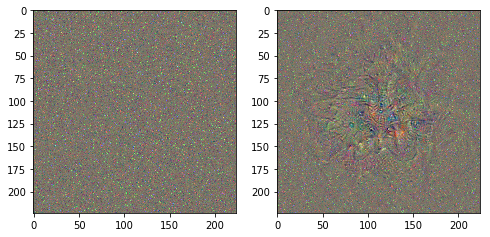

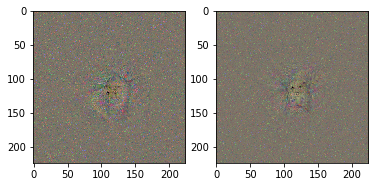

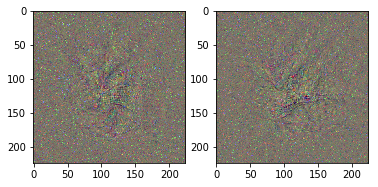

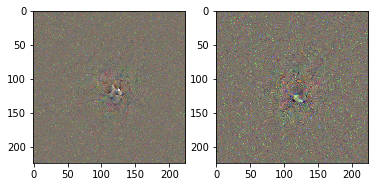

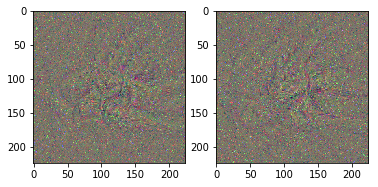

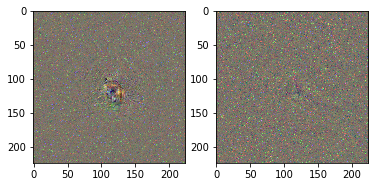

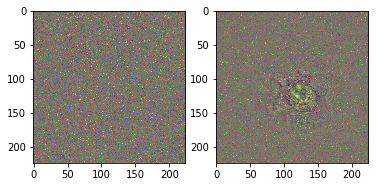

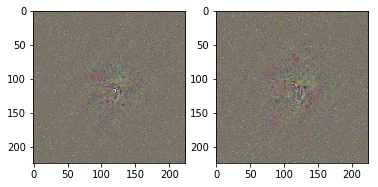

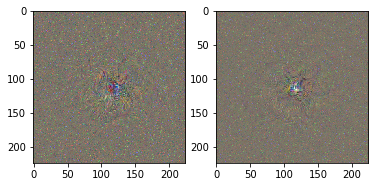

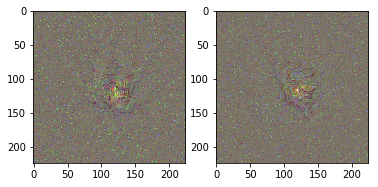

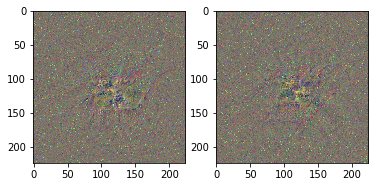

In [58]:
figsize = (8, 4)
ch = 76
plt.figure(figsize=figsize)
tmp = plots.normalize_inputspace(np_images0[ch])
tmp = plots.input2image(tmp)
plt.subplot(1, 2, 1)
plots.imshow_helper(tmp)
tmp = plots.normalize_inputspace(np_images[ch])
tmp = plots.input2image(tmp)
plt.subplot(1, 2, 2)
plots.imshow_helper(tmp)
plt.show()

for ch in range(len(np_images0)):
    if ch == 10:
        break
    plt.figure()
    tmp = plots.normalize_inputspace(np_images0[ch])
    tmp = plots.input2image(tmp)
    plt.subplot(1, 2, 1)
    plots.imshow_helper(tmp)
    tmp = plots.normalize_inputspace(np_images[ch])
    tmp = plots.input2image(tmp)
    plt.subplot(1, 2, 2)
    plots.imshow_helper(tmp)

    plt.show()
    

#     tmp = plots.input2image(np_images[ch])
#     plt.figure()
#     plots.imshow_helper(tmp)
#     plt.show()

In [42]:
device = "cpu"
model = model.to(device)

In [45]:
np_images = make_np_images()

0


100%|██████████| 50/50 [09:48<00:00, 11.82s/it]


In [47]:
# %load ../src/analyize_optimalinput.py

import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import optim
from tqdm import tqdm

from utils import receptive_field
from utils.receptive_field import get_downconv
from utils.receptive_field_tracker import RFTracker
from my_model import get_receptive_field
from utils import plots
from utils.plots import input2image
from utils.plots import clip_on_imagespace
from utils.analysis import exts
from utils import config

if __name__ == '__main__':
    import argparse
    from utils.load_model import get_model
    parser = argparse.ArgumentParser(
        description='Generate mean receptive field')
    parser.add_argument('-l', '--layer-name', type=str, default='layer1.0.conv1',
                        help='layer name of feature map defined by user')
    parser.add_argument('-o', '--out', type=str, default='analysis/optimal',
                        help='output directory name')
    parser.add_argument('-b', '--batch-size', type=int, default=256,
                        help='mini batch size')
    parser.add_argument('-m', '--max-iter', type=int, default=50,
                        help='max itertion number')
    parser.add_argument('-a', '--arch', type=str, default='resnet34',
                        help='model architecture. using get_model()')
    parser.add_argument('--device', type=str, default='cpu',
                        help='model architecture')
    parser.add_argument('--lr', type=float, default=5e-2,
                        help='learning rate')
    parser.add_argument('--wd', type=float, default=1e-4,
                        help='weight decay')
    parser.add_argument('--mode', choices=['neuron', 'layer', "other"], default='neuron',
                        help='available choices')
    parser.add_argument('--random', choices=['normal', 'uniform'], default='noraml',
                        help='available random choices')
    parser.add_argument('--optim', choices=['adam', 'lbfgs'], default='adam',
                        help='available optimizers')
    parser.add_argument('--seed', type=int, default=0,
                        help='random seed')
    parser.add_argument('--zero-start', action="store_true",
                        help='initial ')
    parser.add_argument('--channel-wise', action="store_true",
                        help='initial ')
    parser.add_argument('--off-sorted-channel', dest="is_sorted_channel", action="store_false",
                        help='initial ')
    parser.add_argument('--clip-inputspace', action="store_true",
                        help='initial ')
    args = parser.parse_args()

    seed = args.seed
    if seed is not None:
        np.random.seed(seed)
        torch.manual_seed(seed)

    mode = args.mode
    layer_name = args.layer_name
    batch_size = args.batch_size
    max_iter = args.max_iter
    lr = args.lr
    wd = args.wd
    device = args.device
    random_type = args.random
    channel_wise = args.channel_wise
    zero_start = args.zero_start
    optim_type = args.optim.lower()
    is_sorted_channel = args.is_sorted_channel
    clip_inputspace = args.clip_inputspace
    model = get_model(args.arch)
    model = model.to(device)
    model = model.eval()

    for m in model.parameters():
        m.require_grad = False

    tracker = RFTracker(model)
    img = torch.randn(1, 3, 224, 224, device=device)
    out = model(img, layers=[layer_name])[layer_name]
    # check arch is path
    if os.path.exists(args.arch):
        dname = os.path.dirname(args.arch)
        arch_name = os.path.basename(dname)
    else:
        arch_name = args.arch
    out_path = '{}_layer-{}'.format(arch_name,
                                       args.layer_name)
    # path = '{}_layer-{}'.format(args.arch, args.layer_name)
    print(out_path)
    final_rf = tracker.rf_pool[layer_name]
    _, _, h, w = out.shape
    center, rf = get_receptive_field((h // 2, w // 2), final_rf)
    hs, ws = receptive_field.get_rf_region(center, rf)
    tracker.remove_hook()
    fmap_shape = out.shape

    channels = fmap_shape[1]
    # lr = channels * lr
    # wd = channels * wd

    def make_np_images():
        np_images = np.zeros((channels, 3, 224, 224))
        for b in range(0, channels, batch_size):
            print(b)
            bd = len(np_images[b:b + batch_size])
            if zero_start:
                images = torch.zeros(
                    bd, 3, 224, 224, requires_grad=True, device=device)
            else:
                if random_type == "normal":
                    images = torch.randn(
                        bd, 3, 224, 224, requires_grad=True, device=device)
                elif random_type == "uniform":
                    images = torch.empty(bd, 3, 224, 224, requires_grad=True, device=device)
                    torch.nn.init.uniform_(images, -1, 1)
                else:
                    raise ValueError(random_type)

            if optim_type == "adam":
                optimizer = optim.Adam([images], lr=lr, weight_decay=wd)
                for _ in tqdm(range(max_iter), total=max_iter):
                    optimizer.zero_grad()
                    out = model.layer_forward(images, layers=[layer_name])[layer_name]
                    _, c, h, w = out.shape
                    n_index = torch.arange(bd, dtype=torch.long, device=device)
                    ch_index = torch.arange(b, b + bd, dtype=torch.long, device=device)
                    if mode == 'neuron':
                        o = out[n_index, ch_index, h // 2, w // 2]
                        loss = - torch.sum(o) / len(images)
                        loss.backward()
                    elif mode == "layer":
                        o = out[n_index, ch_index] / (h * w)
                        loss = - torch.sum(o) / len(images)
                        loss.backward()
                    else:
                        o = out[n_index, ch_index, h // 2, w // 2]
                        with torch.no_grad():
                            tensor = -0.01 * torch.ones_like(o)
                        with torch.no_grad():
                            loss = - torch.sum(o) / len(images)
                        o.backward(gradient=tensor)
                    optimizer.step()
                    if clip_inputspace:
                        images = clip_on_imagespace(images)
            elif optim_type == "lbfgs":
                optimizer = optim.LBFGS([images], lr=lr, max_iter=5)

                def closure():
                    out = model.layer_forward(images, layers=[layer_name])[layer_name]
                    _, c, h, w = out.shape
                    n_index = torch.arange(bd, dtype=torch.long, device=device)
                    ch_index = torch.arange(b, b + bd, dtype=torch.long, device=device)
                    if mode == 'neuron':
                        o = out[n_index, ch_index, h // 2, w // 2]
                        loss = - torch.sum(o) / len(images) + wd * torch.mean(torch.pow(images, 2))
                    elif mode == "layer":
                        o = out[n_index, ch_index] / (h * w)
                        loss = - torch.sum(o) / len(images) + wd * torch.mean(torch.pow(images, 2))
                    loss.backward()
                    return loss

                for _ in tqdm(range(max_iter), total=max_iter):
                    optimizer.zero_grad()
                    optimizer.step(closure)
                    if clip_inputspace:
                        images = clip_on_imagespace(images, image_min=0.3, image_max=0.7)
            else:
                raise ValueError(optim_type)

            np_images[b:b + bd] = images.to('cpu').detach().numpy()
        if mode in ('neuron', "other"):
            np_images = np_images[:, :, hs[0]:hs[1], ws[0]:ws[1]]
        return np_images

    def make_np_images_channelwise():
        np_len = int(channels * batch_size)
        np_images = np.zeros((np_len, 3, 224, 224))
        for b in tqdm(range(0, np_len, batch_size), total=channels):
            cur_channel = b // batch_size
            if zero_start:
                images = torch.zeros(
                    batch_size, 3, 224, 224, requires_grad=True, device=device)
            else:
                if random_type == "normal":
                    images = torch.randn(
                        batch_size, 3, 224, 224, requires_grad=True, device=device)
                elif random_type == "uniform":
                    images = torch.empty(batch_size, 3, 224, 224, requires_grad=True, device=device)
                    torch.nn.init.uniform_(images, -1, 1)
                else:
                    raise ValueError(random_type)

            if optim_type == "adam":
                optimizer = optim.Adam([images], lr=lr, weight_decay=wd)
                for _ in range(max_iter):
                    optimizer.zero_grad()
                    out = model.layer_forward(images, layers=[layer_name])[layer_name]
                    _, c, h, w = out.shape
                    n_index = torch.arange(batch_size, dtype=torch.long, device=device)
                    ch_index = cur_channel * torch.ones(batch_size, dtype=torch.long, device=device)
                    if mode == 'neuron':
                        o = out[n_index, ch_index, h // 2, w // 2]
                        loss = - torch.sum(o) / len(images)
                        loss.backward()
                    elif mode == "layer":
                        o = out[n_index, ch_index] / (h * w)
                        loss = - torch.sum(o) / len(images)
                        loss.backward()
                    else:
                        o = out[n_index, ch_index, h // 2, w // 2]
                        with torch.no_grad():
                            tensor = -(channels / 64) * torch.ones_like(o)
                        with torch.no_grad():
                            loss = - torch.sum(o) / len(images)
                        o.backward(gradient=tensor)
                    optimizer.step()
                    if clip_inputspace:
                        images = clip_on_imagespace(images)
            elif optim_type == "lbfgs":
                optimizer = optim.LBFGS([images], lr=lr, max_iter=5)

                def closure():
                    out = model.layer_forward(images, layers=[layer_name])[layer_name]
                    _, c, h, w = out.shape
                    n_index = torch.arange(batch_size, dtype=torch.long, device=device)
                    ch_index = cur_channel * torch.ones(batch_size, dtype=torch.long, device=device)
                    if mode == 'neuron':
                        o = out[n_index, ch_index, h // 2, w // 2]
                        loss = - torch.sum(o) / len(images) + wd * torch.mean(torch.pow(images, 2))
                    elif mode == "layer":
                        o = out[n_index, ch_index] / (h * w)
                        loss = - torch.sum(o) / len(images) + wd * torch.mean(torch.pow(images, 2))
                    loss.backward()
                    return loss

                for _ in range(max_iter):
                    optimizer.zero_grad()
                    optimizer.step(closure)
                    if clip_inputspace:
                        images = clip_on_imagespace(images)
            else:
                raise ValueError(optim_type)

            # print("loss: {}".format(loss.item()))
            np_images[b:b + batch_size] = images.to('cpu').detach().numpy()
        if mode in ('neuron', "other"):
            np_images = np_images[:, :, hs[0]:hs[1], ws[0]:ws[1]]
        return np_images

    if channel_wise:
        np_images = make_np_images_channelwise()
    else:
        np_images = make_np_images()

    np_down_weight = None
    down_weights = []
    for name, weight in model.named_parameters():
        if 'downsample.0' in name:
            down_weights.append(weight.detach().to('cpu').numpy())

        if layer_name + '.weight' == name:
            np_down_weight = weight.detach().to('cpu').numpy()

    # model is of ResNets
    np_conv = model.conv1.weight.detach().to('cpu').numpy()
    if np_down_weight is not None and 'plain' not in args.arch:
        # only ResNet
        for down_weight in down_weights:
            if np_conv.shape[0] == np_down_weight.shape[1]:
                break
            np_conv = get_downconv(np_conv, down_weight)
        np_downconv1 = get_downconv(np_conv, np_down_weight)
    else:
        # ResNet or PlainNet
        if len(down_weights) > 0:
            # only ResNEt
            for down_weight in down_weights:
                if np_conv.shape[0] == fmap_shape[1]:
                    break
                np_conv = get_downconv(np_conv, down_weight)
        np_downconv1 = np_conv

    if np_down_weight is not None and 'plain' not in args.arch:
        # sort by down conv weight norm
        sorted_channels = np.argsort(np.linalg.norm(
            np_downconv1.reshape(len(np_downconv1), -1), axis=-1))[::-1]
    else:
        sorted_channels = np.arange(fmap_shape[1])

    if not channel_wise and is_sorted_channel:
        np_images = np_images[sorted_channels]

    dir_path = os.path.join(args.out, out_path)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

    if seed is None:
        fname = "args.config"
    else:
        fname = "args.config{:08}".format(seed)
    config_path = os.path.join(dir_path, fname)
    config.save_config_file_from_args(config_path, args)

    if seed is not None:
        out_path = os.path.join(dir_path, '{}-images{:08}'.format(args.mode, seed))
    else:
        out_path = os.path.join(dir_path, '{}-images'.format(args.mode))
    np.save(out_path, np_images)

    if channel_wise:
        k = 0
        if seed is None:
            out_name = "{}-all-images-{}".format(mode, k)
        else:
            out_name = "{}-all-images-{}-{:08}".format(mode, k, seed)
        _, ch, h_size, w_size = np_images.shape
        imgs = np_images.reshape(channels, batch_size, ch, h_size, w_size)[:, k]

        def normalize_func(x):
            return input2image(x, img_format="HWC")
        plots.plot_imshows(imgs, normalize=normalize_func, title="count", exts=exts, out_dir=dir_path, out_name=out_name)
        if seed is None:
            out_name = "{}-all-images-{}-norm".format(mode, k)
        else:
            out_name = "{}-all-images-{}-norm{:08}".format(mode, k, seed)

        def normalize_func(x):
            img_format = "HWC"
            return input2image(plots.normalize_inputspace(x, img_format=img_format), img_format=img_format)
        plots.plot_imshows(imgs, normalize=normalize_func, title="count", exts=exts, out_dir=dir_path, out_name=out_name)
    else:
        n = 2
        m = np.ceil(np.sqrt(channels))
        plt.figure(figsize=(n * m, n * m))
        for k in range(channels):
            tmp = input2image(np_images[k])
            plt.subplot(m, m, k + 1)
            plt.title(k)
            plt.imshow(np.transpose(np.clip(tmp, 0, 1), (1, 2, 0)))
            plt.axis('off')
        plt.tight_layout()
        for ext in exts:
            if seed is None:
                img_path = os.path.join(dir_path, '{}-all-images.{}'.format(args.mode, ext))
            else:
                img_path = os.path.join(dir_path, '{}-all-images{:08}.{}'.format(args.mode, seed, ext))
            plt.savefig(img_path, transparent=True)
        plt.close()

        plt.figure(figsize=(n * m, n * m))
        for k in range(channels):
            tmp = plots.normalize_inputspace(np_images[k])
            tmp = input2image(tmp)
            plt.subplot(m, m, k + 1)
            plt.title(k)
            plt.imshow(np.transpose(np.clip(tmp, 0, 1), (1, 2, 0)))
            plt.axis('off')
        plt.tight_layout()
        for ext in exts:
            if seed is None:
                img_path = os.path.join(dir_path, '{}-all-images-norm.{}'.format(args.mode, ext))
            else:
                img_path = os.path.join(dir_path, '{}-all-images-norm{:08}.{}'.format(args.mode, seed, ext))
            plt.savefig(img_path, transparent=True)
        plt.close()
    print("saved ==> ", dir_path)


usage: ipykernel_launcher.py [-h] [-l LAYER_NAME] [-o OUT] [-b BATCH_SIZE]
                             [-m MAX_ITER] [-a ARCH] [--device DEVICE]
                             [--lr LR] [--wd WD] [--mode {neuron,layer,other}]
                             [--random {normal,uniform}]
                             [--optim {adam,lbfgs}] [--seed SEED]
                             [--zero-start] [--channel-wise]
                             [--off-sorted-channel] [--clip-inputspace]
ipykernel_launcher.py: error: unrecognized arguments: -f /run/user/1001/jupyter/kernel-362eb3b7-b3a5-4aca-a255-f5c2a3e7a021.json


SystemExit: 2

/home/genta/.pyenv/versions/dlb2-pytorch/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
n_classes = 1000

In [6]:
dataset = get_ilsvrc2012(mode="test")

In [7]:
device = "cuda:1"
N = int(256 * 25)
images = torch.stack([dataset[i][0] for i in range(N)]).to(device)